In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append("../")
import folderparser as fp
import folderscraper as fs
import interfacemetrics as intm
from interfacePlots import *
from config import cfg
import logging

In [3]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [4]:
SERVERFOLDER = os.path.join(cfg.path.server, r'conicalNozzle')
EXPORTFOLDER = os.path.join(cfg.path.fig, 'conicalNozzle', 'plots')
TOPFOLDERS = [os.path.join(SERVERFOLDER, s) for s in ['orig', 'horizontal', 'speed_sweep', 'visc_speed']]

# Generating Files

In [142]:
import pandas as pd
o = []
for topfolder in [SERVERFOLDER]:
    for f in fp.caseFolders(topfolder):
        fs.populate(f)
        l = fp.legendUnique(f)
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
p.to_csv(r'\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\conicalNozzle\legend_mesh.csv')

In [5]:
import pandas as pd
o = []
for topfolder in [r'C:\Users\lmf1\Documents\OpenFOAM\conical']:
    for f in os.listdir(topfolder):
        l = fp.legendUnique(os.path.join(topfolder, f))
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
p.to_csv(os.path.join(cfg.path.fig, 'conicalNozzle', 'legend_speed_rhe_angle.csv'))

In [118]:
fs.addUnitsToLegend(r'\\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\viscositysweep\newtnewtsweep\nb73')

INFO:root:Exported file \\cfs2e.nist.gov\642\NIST_Projects\Additive Manufacturing and Rheology\OpenFOAM\simulations\viscositysweep\newtnewtsweep\nb73\legend.csv


In [118]:
import pandas as pd
o = []
for topfolder in TOPFOLDERS:
    for f in fp.caseFolders(topfolder):
        l = fp.legendUnique(f)
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
p.to_csv(os.path.join(cfg.path.fig, 'conicalNozzle', 'legend_general.csv'))

In [191]:
for topfolder in TOPFOLDERS:
    for folder in fp.caseFolders(topfolder):
        intm.sumAndSteady(folder, False)

# Plots

### nozzle angle, bath size

In [298]:
time = 2.5
x = 5
labels = ['arean', 'vertdispn', 'aspectratio', 'speeddecay']
xvar = 'nozzle_angle'
yvar = 'bath_depth'
imsize=1
kwargs = {'overwrite':True, 'xvar':xvar, 'yvar':yvar}

# export plots
exportMeta = False
exportMetrics = False
exportXS = False
exportPics = True
exportSteady = False
exportStress = False
piclist = ['y_viscy', 'x_viscx', 'y_umag', 'y_shearStressy']

for TOPFOLDER in [TOPFOLDERS[0]]:
    if exportMeta:
        # metadata
        txtPlots0(TOPFOLDER, EXPORTFOLDER, **kwargs)
        timePlots(TOPFOLDER, EXPORTFOLDER, **kwargs)
        runtimePlots0(TOPFOLDER, EXPORTFOLDER, **kwargs)

    if exportMetrics:
        # metrics: aspect ratio, speed, area
        qualityPlots0(TOPFOLDER, EXPORTFOLDER, time, x, labels=labels, cvar=yvar, **kwargs)

    if exportXS:
        # cross-sections
        XSPlots0(TOPFOLDER, EXPORTFOLDER, time, x, sigma, **kwargs)

    if exportPics:
        # images
        for ta in piclist:
            picPlots0(TOPFOLDER, EXPORTFOLDER, time, 0, tag=ta, **kwargs)

    if exportSteady:
        # stability
        steadyPlots(TOPFOLDER, imsize, EXPORTFOLDER, [0], **kwargs)

    if exportStress:
        # shear stress vs. position
        shearStressPlots0(TOPFOLDER, EXPORTFOLDER, time, cvar=xvar, bath_depth_list=[6.05], **kwargs)
        shearStressPlots0(TOPFOLDER, EXPORTFOLDER, time, cvar=xvar, bath_depth_list=[4.24, 4.35, 4.72, 5.12], **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_y_viscy_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_x_viscx_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_y_umag_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_y_shearStressy_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth


In [338]:
kwargs = {'overwrite':True, 'xvar':xvar, 'yvar':yvar}
qualityPlots0(TOPFOLDERS[0], EXPORTFOLDER, time, x, labels=['aspectratio', 'speeddecay'], cvar='', bath_depth_list=[6.05], **kwargs)
[picPlots0(TOPFOLDERS[0], EXPORTFOLDER, time, 0, tag=ta, bath_depth_list=[6.05], adjustBounds=False, **kwargs) for ta in ['y_shearStressy', 'y_viscy']]

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\trace_across_orig_bath_depth_list_[6.05]


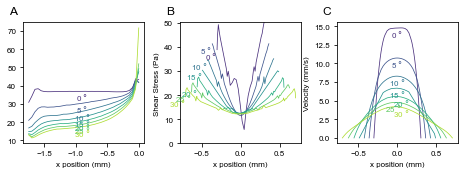

In [117]:
withinNozzle0(TOPFOLDERS[0], EXPORTFOLDER, 2.5, 1, bath_depth_list=[6.05], overwrite=True )

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\xs_5_t_2.5_orig_bath_depth_list_[6.05]_cvar_nozzle_angle_xvar_nozzle_angle_yvar_bath_depth


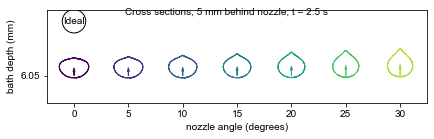

In [96]:
XSPlots0(TOPFOLDERS[0], EXPORTFOLDER, 2.5, 5, 0, bath_depth_list=[6.05], adjustBounds=False, cvar='nozzle_angle', xvar='nozzle_angle', yvar='bath_depth', overwrite=True)

### bath speed

In [278]:
time = 2.5
x = 2
xvar = 'vsup'
yvar = 'nozzle_angle'
labels = ['arean', 'vertdispn', 'aspectratio', 'speeddecay']
kwargs = {'overwrite':True, 'xvar':xvar, 'yvar':yvar}

# export plots
exportMeta = False
exportMetrics = False
exportXS = False
exportPics = True
exportSteady = False
exportStress = False

for TOPFOLDER in [TOPFOLDERS[2]]:
    if exportMeta:
        # metadata
        txtPlots0(TOPFOLDER, EXPORTFOLDER, **kwargs)
        timePlots(TOPFOLDER, EXPORTFOLDER, **kwargs)
        runtimePlots0(TOPFOLDER, EXPORTFOLDER, **kwargs)

    if exportMetrics:
        # metrics: aspect ratio, speed, area
        qualityPlots0(TOPFOLDER, EXPORTFOLDER, time, x, labels=labels, cvar=yvar, **kwargs)

    if exportXS:
        # cross-sections
        XSPlots0(TOPFOLDER, EXPORTFOLDER, time, x, sigma, **kwargs)

    if exportPics:
        # images
        for ta in ['y_viscy', 'x_viscx', 'y_umag']:
            picPlots0(TOPFOLDER, EXPORTFOLDER, t, 0, tag=ta, adjustBounds=False, **kwargs)

    if exportSteady:
        # stability
        steadyPlots(TOPFOLDER, imsize, EXPORTFOLDER, [0], **kwargs)

    if exportStress:
        # shear stress vs. position
        shearStressPlots0(TOPFOLDER, EXPORTFOLDER, time, cvar=xvar, **kwargs)


INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\pics_y_viscy_t2.5_sigma_0_speed_sweep_xvar_vsup_yvar_nozzle_angle
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\pics_x_viscx_t2.5_sigma_0_speed_sweep_xvar_vsup_yvar_nozzle_angle
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\pics_y_umag_t2.5_sigma_0_speed_sweep_xvar_vsup_yvar_nozzle_angle


INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\trace_across_speed_sweep_vsup_list_[5, 7.5, 10, 12.5, 15]
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\xs_5_t_2.5_speed_sweep_cvar_vsup_xvar_vsup_yvar_nozzle_angle_vsup_list_[5, 7.5, 10, 12.5, 15]


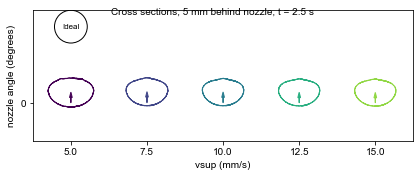

In [111]:
withinNozzle0(TOPFOLDERS[2], EXPORTFOLDER, 2.5, 1, cvar='vsup', overwrite=True , vsup_list=[5, 7.5, 10, 12.5, 15])
XSPlots0(TOPFOLDERS[2], EXPORTFOLDER, 2.5, 5, 0, adjustBounds=False, cvar='vsup', xvar='vsup', yvar='nozzle_angle', vsup_list=[5, 7.5, 10, 12.5, 15], overwrite=True)